# 作業
* 試著模擬出 5 群高斯分布的資料, 並以此觀察 K-mean 與輪廓分析的結果  

In [29]:
# 載入套件
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import matplotlib.cm as cm
from sklearn.datasets import make_blobs
from sklearn.cluster import KMeans
from sklearn import datasets
from sklearn.metrics import silhouette_samples, silhouette_score

np.random.seed(5)

%matplotlib inline

In [33]:
# 生成 5 群資料
X, y = make_blobs(n_samples=500,
                  n_features=2,
                  centers=5,
                  cluster_std=1,
                  center_box=(-10.0, 10.0),
                  shuffle=True,
                  random_state=42) 

In [34]:
# 設定需要計算的 K 值集合
range_n_clusters = [2, 3, 4, 5, 6, 7, 8]

For n_clusters = 2 The average silhouette_score is : 0.594
For n_clusters = 3 The average silhouette_score is : 0.708
For n_clusters = 4 The average silhouette_score is : 0.733
For n_clusters = 5 The average silhouette_score is : 0.679
For n_clusters = 6 The average silhouette_score is : 0.621
For n_clusters = 7 The average silhouette_score is : 0.543
For n_clusters = 8 The average silhouette_score is : 0.469


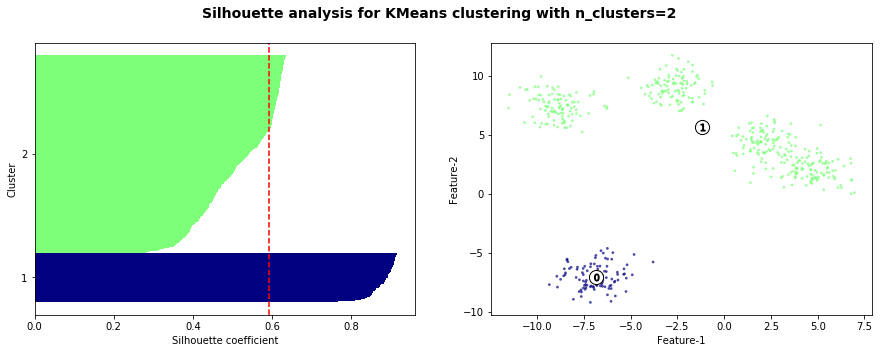

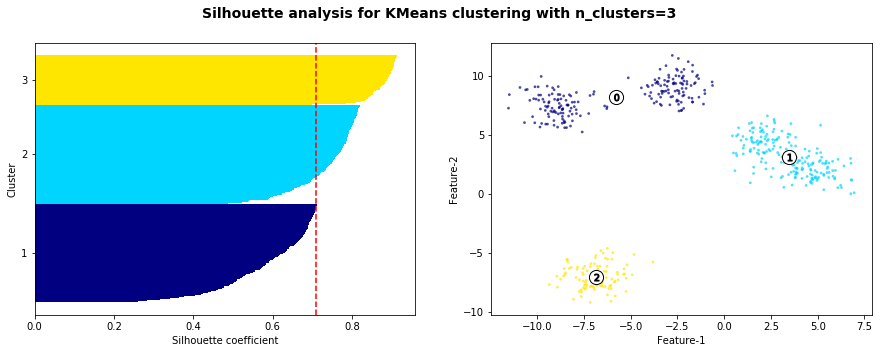

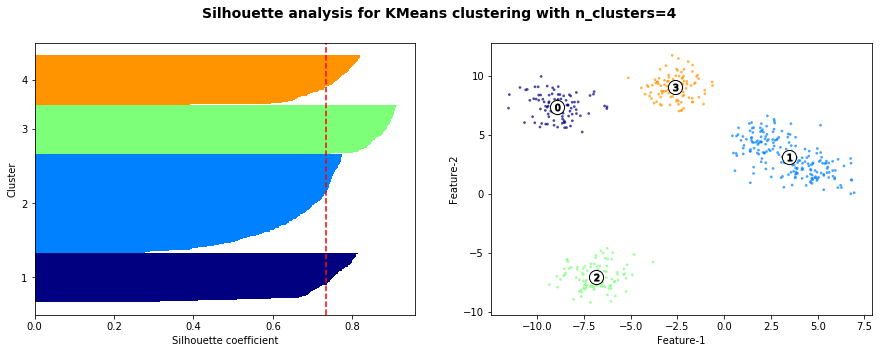

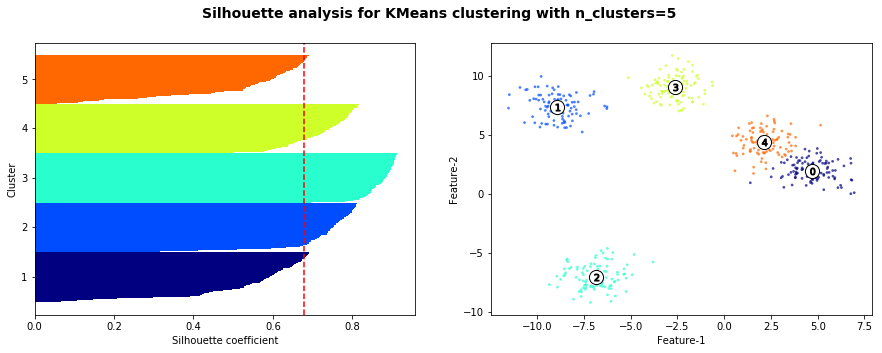

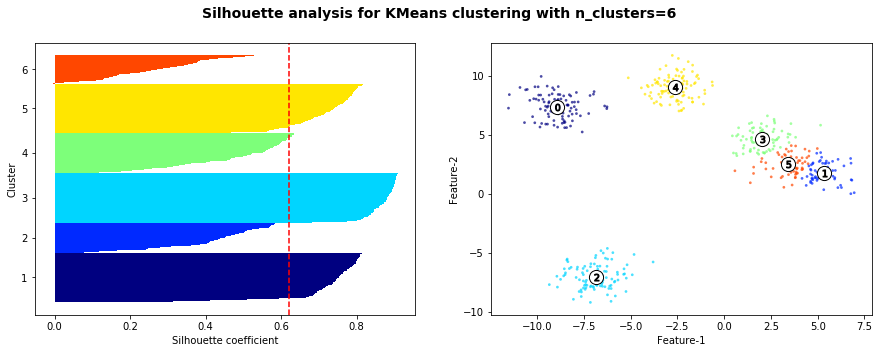

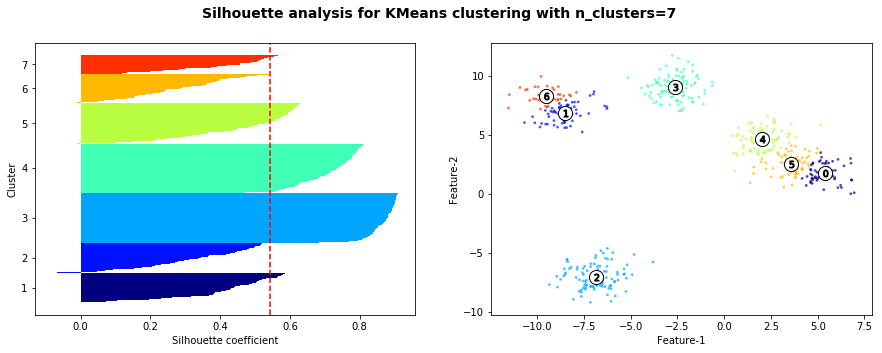

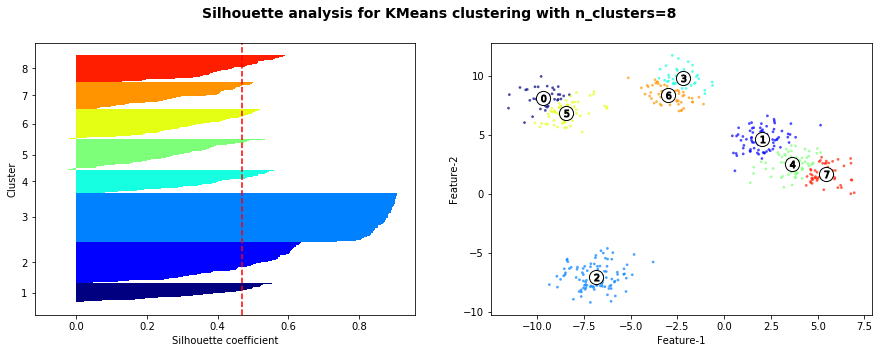

In [35]:
# 計算並繪製輪廓分析的結果
for n_clusters in range_n_clusters:
    km = KMeans(
                n_clusters=n_clusters,
                init='k-means++',
                n_init=10,
                max_iter=300,
                tol=1e-4,
                random_state=0)
    y_km = km.fit_predict(X)
    
    cluster_labels = np.unique(y_km)
    silhouette_vals = silhouette_samples(X, y_km, metric='euclidean')
    silhouette_avg = silhouette_score(X, y_km)
    
    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 5))
    y_ax_lower, y_ax_upper = 0, 0
    yticks = []
    for i, c in enumerate(cluster_labels):
        c_silhouette_vals = silhouette_vals[y_km == c]
        c_silhouette_vals.sort()
        y_ax_upper += len(c_silhouette_vals)
        color = cm.jet(float(i) / n_clusters)
        ax1.barh(range(y_ax_lower, y_ax_upper),
                c_silhouette_vals,
                height=1.0,
                edgecolor='none',
                color=color)
        
        yticks.append((y_ax_lower + y_ax_upper) / 2)
        y_ax_lower += len(c_silhouette_vals)
    ax1.axvline(silhouette_avg, color='red', linestyle='--')
    ax1.set_yticks(yticks)
    ax1.set_yticklabels(cluster_labels+1)
    ax1.set_ylabel('Cluster')
    ax1.set_xlabel('Silhouette coefficient')
    
    plt.suptitle(f"Silhouette analysis for KMeans clustering with n_clusters={n_clusters}",
                 fontsize=14, fontweight='bold')
    
    colors = cm.jet(y_km.astype(float) / n_clusters)
    ax2.scatter(X[:, 0], X[:, 1], marker='.', s=30, lw=0, alpha=0.7,
                c=colors, edgecolor='k')
    
    centers = km.cluster_centers_
    # Draw white circles at cluster centers
    ax2.scatter(centers[:, 0], centers[:, 1], marker='o',
                c="white", alpha=1, s=200, edgecolor='k')

    for i, c in enumerate(centers):
        ax2.scatter(c[0], c[1], marker='$%d$' % i, alpha=1,
                    s=50, edgecolor='k')
    ax2.set_xlabel('Feature-1')
    ax2.set_ylabel('Feature-2')
    
    print(f"For n_clusters = {n_clusters} The average silhouette_score is : {silhouette_avg:.3f}")
    